In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import xarray as xa

from astropy.units import R_earth, R_jup, R_sun

rc('figure', figsize=(13,5))

def load_mcmc(fname: str):
    ds = xa.load_dataset(fname)
    return pd.DataFrame(array(ds.mcmc_samples).reshape([-1, ds.parameter.size]), columns=ds.parameter)

In [3]:
%run toi_2266.py

In [5]:
dfp = load_mcmc('toi-2266.01-joint-achromatic-p2.nc')

In [6]:
ns = dfp.shape[0]
dfp['radius'] = (sqrt(dfp.k2).values * normal(star_r.n, star_r.s, ns) * R_sun).to(R_earth).value

In [7]:
df = pd.read_csv('data/exoplanet.eu_catalog.csv')

In [8]:
df['radius_e'] = (df.radius.values * R_jup).to(R_earth).value

In [9]:
mask = df.star_teff < 4000
mask &= df.radius_e < 2.5
mask &= df.orbital_period < 5

In [10]:
d = df[mask]

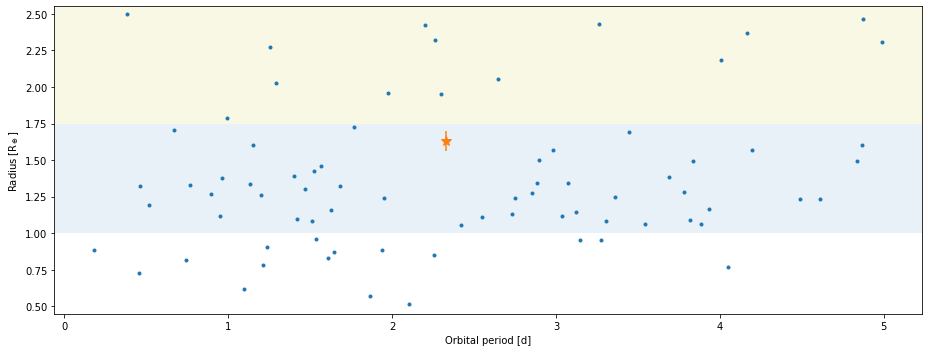

In [11]:
fig, ax = subplots()
ax.plot(d.orbital_period, d.radius_e, '.')
ax.errorbar(dfp.p.median(), dfp.radius.median(), dfp.radius.std(), fmt='*', ms=10)
ax.axhspan(1, 1.75, alpha=0.1)
ax.axhspan(1.75, 3.5, fc='y', alpha=0.1)
setp(ax, xlabel='Orbital period [d]', ylabel='Radius [R$_\oplus$]', ylim=(0.45, 2.55))
fig.tight_layout()

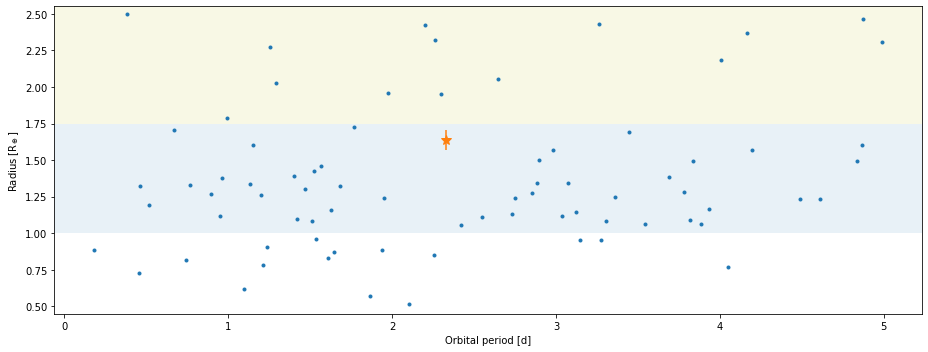

In [115]:
fig, ax = subplots()
ax.plot(d.orbital_period, d.radius_e, '.')
ax.errorbar(dfp.p.median(), dfp.radius.median(), dfp.radius.std(), fmt='*', ms=10)
ax.axhspan(1, 1.75, alpha=0.1)
ax.axhspan(1.75, 3.5, fc='y', alpha=0.1)
setp(ax, xlabel='Orbital period [d]', ylabel='Radius [R$_\oplus$]', ylim=(0.45, 2.55))
fig.tight_layout()

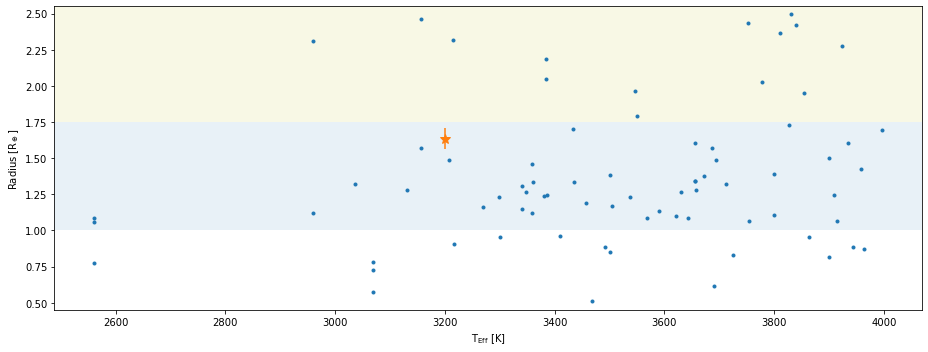

In [116]:
fig, ax = subplots()
ax.plot(d.star_teff, d.radius_e, '.')
ax.errorbar(star_teff.n, dfp.radius.median(), dfp.radius.std(), fmt='*', ms=10)
ax.axhspan(1, 1.75, alpha=0.1)
ax.axhspan(1.75, 3.5, fc='y', alpha=0.1)
setp(ax, xlabel='T$_\mathrm{Eff}$ [K]', ylabel='Radius [R$_\oplus$]', ylim=(0.45, 2.55))
fig.tight_layout()

In [111]:
import seaborn as sb

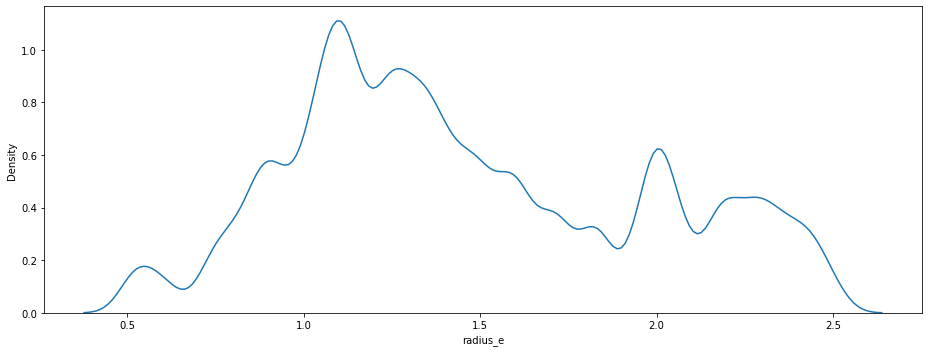

In [112]:
fig, ax = subplots()
sb.kdeplot(d.radius_e, ax=ax, bw_adjust=0.25)
fig.tight_layout()